# ANZ Customer Retention Analysis

## Data Source 
Transaction records for 100 hypothetical customers of ANZ bank across a 3 month period. Includes data regarding transaction type, transaction time & date, transaction amounts, customer details including age, gender and balance and also location data for certain transactions. 

## Outline
The structure of this notebook is as follows:

- First, we will start off by loading and viewing the dataset.
- We will see that the dataset has a mixture of both numerical and non-numerical features, that it contains values from different ranges, plus that it contains a number of missing entries.
- We will have to preprocess the dataset to ensure the machine learning model we choose can make good predictions.
- After our data is in good shape, we will do exploratory data analysis to identify potential banking business opportunities.

## Data Input

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# read input files
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

#Reading the excel file

df=pd.read_csv('../input/anz-synthesised-transaction-dataset/anz.csv')

/kaggle/input/anz-synthesised-transaction-dataset/anz.csv


In [2]:
df.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


## Inspecting the transactions

In [3]:
df.shape

(12043, 23)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   status             12043 non-null  object 
 1   card_present_flag  7717 non-null   float64
 2   bpay_biller_code   885 non-null    object 
 3   account            12043 non-null  object 
 4   currency           12043 non-null  object 
 5   long_lat           12043 non-null  object 
 6   txn_description    12043 non-null  object 
 7   merchant_id        7717 non-null   object 
 8   merchant_code      883 non-null    float64
 9   first_name         12043 non-null  object 
 10  balance            12043 non-null  float64
 11  date               12043 non-null  object 
 12  gender             12043 non-null  object 
 13  age                12043 non-null  int64  
 14  merchant_suburb    7717 non-null   object 
 15  merchant_state     7717 non-null   object 
 16  extraction         120

- The dataset has 12043 transations with 23 features including status, account, date, gender etc.
- 18 non-numeric features and 5 numeric features.

In [5]:
df.tail(6)

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
12037,posted,NaN,NaN,ACC-240804743,AUD,121.48 -30.75,PAYMENT,NaN,NaN,Kenneth,...,29,NaN,NaN,2018-10-31T23:00:00.000+0000,39.00,c7bc398b9eb04e73933dc6d5a7beae0b,Australia,CUS-261674136,NaN,debit
12038,authorized,0.0,NaN,ACC-3021093232,AUD,149.83 -29.47,POS,32aa73dc-b7c2-4161-b14d-6271b96ce792,NaN,Melissa,...,30,Ringwood,VIC,2018-10-31T23:09:06.000+0000,9.79,f2e3e695c2ee4c50a4c8747f852cbe2e,Australia,CUS-55310383,145.23 -37.81,debit
12039,authorized,1.0,NaN,ACC-1608363396,AUD,151.22 -33.87,SALES-POS,296a0500-8552-48ac-ac81-ec37065b568e,NaN,Robert,...,20,Casula,NSW,2018-10-31T23:21:46.000+0000,63.87,56e147e5485f4683b9076fcaaed76640,Australia,CUS-2688605418,150.88 -33.96,debit
12040,authorized,1.0,NaN,ACC-3827517394,AUD,151.12 -33.89,POS,e5975ab4-08f7-4725-a369-24cc0e35ed6e,NaN,Craig,...,28,Kings Park,NSW,2018-10-31T23:34:25.000+0000,43.96,2fdd4681827343f6af2e6519644a684a,Australia,CUS-2663907001,150.92 -33.74,debit
12041,authorized,1.0,NaN,ACC-2920611728,AUD,144.96 -37.76,SALES-POS,af49051a-591d-4b08-bd3c-27730b70ed37,NaN,Tyler,...,69,Oakleigh,VIC,2018-10-31T23:47:05.000+0000,30.77,74aa9cd7e4af4c6d9cd7dbd28e9aedc9,Australia,CUS-1388323263,145.09 -37.91,debit
12042,authorized,1.0,NaN,ACC-1443681913,AUD,150.92 -33.77,SALES-POS,f31f4b14-2040-40ec-a120-b141bb274cbd,NaN,Ryan,...,31,Mascot,NSW,2018-10-31T23:59:44.000+0000,22.36,6d5218e04e8040b9996850ce11a19426,Australia,CUS-3129499595,151.19 -33.93,debit


## Handling the missing values

In [6]:
df.isnull().sum() 

status                   0
card_present_flag     4326
bpay_biller_code     11158
account                  0
currency                 0
long_lat                 0
txn_description          0
merchant_id           4326
merchant_code        11160
first_name               0
balance                  0
date                     0
gender                   0
age                      0
merchant_suburb       4326
merchant_state        4326
extraction               0
amount                   0
transaction_id           0
country                  0
customer_id              0
merchant_long_lat     4326
movement                 0
dtype: int64

- The dataset is quite clean except some features have quite a lot of NULL values. Let's check 'card_present_flag', 'bpay_biller_code', 'merchant_id','merchant_code', 'merchant_suburb', 'merchant_state', 'merchant_long_lat'.
- 'card_present_flag', 'merchant_state' and 'card_present_flag‘ have two third of not NULL values and by checking the value frequency we think they are still valuable for analyze.
- We will drop the rest.

In [7]:
df['card_present_flag'].value_counts()

1.0    6194
0.0    1523
Name: card_present_flag, dtype: int64

In [8]:
df['merchant_state'].value_counts()

NSW    2169
VIC    2131
QLD    1556
WA     1100
SA      415
NT      205
ACT      73
TAS      68
Name: merchant_state, dtype: int64

In [9]:
df['merchant_id'].value_counts()

106e1272-44ab-4dcb-a438-dd98e0071e51    14
6c84c219-96ea-4c6f-9de5-0a28bcaec62f    12
e28c426d-cbef-4e2d-aa06-1ba0b6b1902f    11
aef30de1-c67e-4ab7-8577-2931a4bf3c7e    10
6ddddc40-5b69-4253-8a26-167999a8bf96    10
                                        ..
5c011d61-fbbe-437f-9ffa-3d9910cd2c7a     1
9eff6ea8-061d-4e88-93a5-6711962d80ed     1
7747bd2b-e29e-486f-b6aa-ad20ec5f6971     1
a851a118-cfad-4232-8dec-f528125fc2a1     1
e5975ab4-08f7-4725-a369-24cc0e35ed6e     1
Name: merchant_id, Length: 5725, dtype: int64

In [10]:
df['merchant_code'].value_counts()

0.0    883
Name: merchant_code, dtype: int64

In [11]:
df.drop(['long_lat','bpay_biller_code','merchant_id','merchant_code','merchant_suburb','merchant_long_lat'],axis=1,inplace=True)

In [12]:
df.isnull().sum() 

status                  0
card_present_flag    4326
account                 0
currency                0
txn_description         0
first_name              0
balance                 0
date                    0
gender                  0
age                     0
merchant_state       4326
extraction              0
amount                  0
transaction_id          0
country                 0
customer_id             0
movement                0
dtype: int64

## Check Duplicates

In [13]:
df.duplicated().sum() 

0

## Change 'date' type to Datetime

In [14]:
df["date"] = pd.to_datetime(df["date"])

In [15]:
df.head()

,status,card_present_flag,account,currency,txn_description,first_name,balance,date,gender,age,merchant_state,extraction,amount,transaction_id,country,customer_id,movement
0,authorized,1.0,ACC-1598451071,AUD,POS,Diana,35.39,2018-08-01,F,26,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,debit
1,authorized,0.0,ACC-1598451071,AUD,SALES-POS,Diana,21.20,2018-08-01,F,26,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,debit
2,authorized,1.0,ACC-1222300524,AUD,POS,Michael,5.71,2018-08-01,M,38,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,debit
3,authorized,1.0,ACC-1037050564,AUD,SALES-POS,Rhonda,2117.22,2018-08-01,F,40,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,debit
4,authorized,1.0,ACC-1598451071,AUD,SALES-POS,Diana,17.95,2018-08-01,F,26,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,debit


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   status             12043 non-null  object        
 1   card_present_flag  7717 non-null   float64       
 2   account            12043 non-null  object        
 3   currency           12043 non-null  object        
 4   txn_description    12043 non-null  object        
 5   first_name         12043 non-null  object        
 6   balance            12043 non-null  float64       
 7   date               12043 non-null  datetime64[ns]
 8   gender             12043 non-null  object        
 9   age                12043 non-null  int64         
 10  merchant_state     7717 non-null   object        
 11  extraction         12043 non-null  object        
 12  amount             12043 non-null  float64       
 13  transaction_id     12043 non-null  object        
 14  countr

# Exploratory Data Analysis



In [17]:
import matplotlib.pyplot as plt 
%matplotlib inline
import matplotlib.ticker as ticker
import seaborn as sns

## Add new columns: Day of the week, month,day of the month

In [18]:
#Function to get date of month
def get_dom(date):
    return date.day

df['dom'] = df['date'].map(get_dom)

def get_weekday(date):
    return date.weekday()

df['weekday'] = df['date'].map(get_weekday)

month = []
for date in df["date"]:
    if date.month == 8:
        month.append("August")
    elif date.month == 9:
        month.append("September")
    elif date.month == 10:
        month.append("October")

df['month'] = month

## Categorical Analysis

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


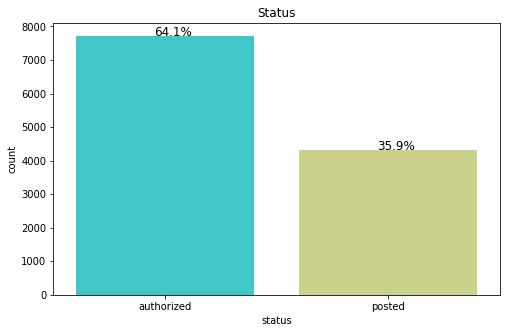

In [19]:
def with_hue(plot, feature, Number_of_categories, hue_categories):
    a = [p.get_height() for p in plot.patches]
    patch = [p for p in plot.patches]
    for i in range(Number_of_categories):
        total = feature.value_counts().values[i]
        for j in range(hue_categories):
            percentage = '{:.1f}%'.format(100 * a[(j*Number_of_categories + i)]/total)
            x = patch[(j*Number_of_categories + i)].get_x() + patch[(j*Number_of_categories + i)].get_width() / 2 - 0.15
            y = patch[(j*Number_of_categories + i)].get_y() + patch[(j*Number_of_categories + i)].get_height() 
            ax.annotate(percentage, (x, y), size = 12)
    plt.show()

def without_hue(plot, feature):
    total = len(feature)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)
    plt.show()
    
plt.figure(figsize=(8,5))
plt.title("Status")
ax=sns.countplot(df['status'],data=df, palette='rainbow')
without_hue(ax,df['status'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


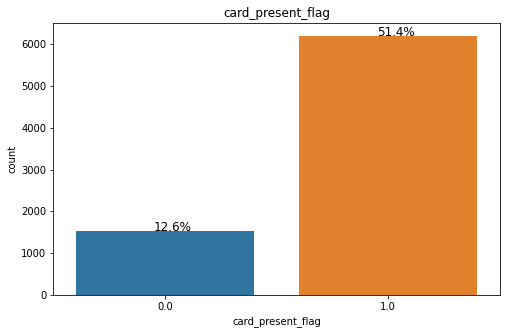

In [20]:
plt.figure(figsize=(8,5))
plt.title("card_present_flag")
ax=sns.countplot(df['card_present_flag'],data=df)
without_hue(ax,df['card_present_flag'])

Text(0.5, 1.0, 'card_present_flag VS amount')

<Figure size 576x360 with 0 Axes>

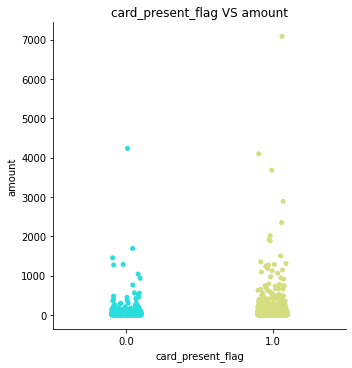

In [21]:
plt.figure(figsize=(8,5))
sns.catplot(x='card_present_flag',y='amount',data=df, palette='rainbow')
plt.title("card_present_flag VS amount")

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


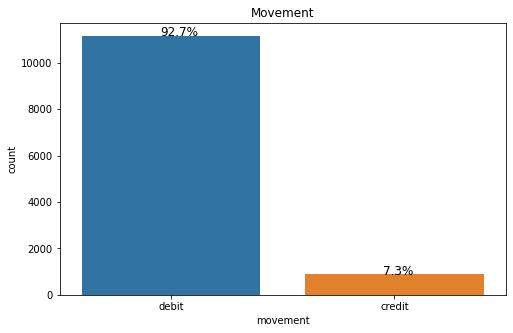

In [22]:
plt.figure(figsize=(8,5))
plt.title("Movement")
ax=sns.countplot(df['movement'],data=df)
without_hue(ax,df['movement'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


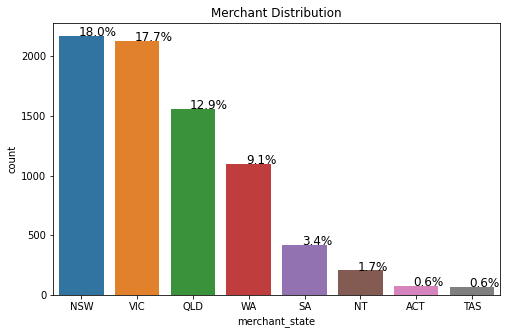

In [23]:
plt.figure(figsize=(8,5))
plt.title("Merchant Distribution")
ax = sns.countplot(df['merchant_state'],data=df,order=df['merchant_state'].value_counts().index)
without_hue(ax,df['merchant_state'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


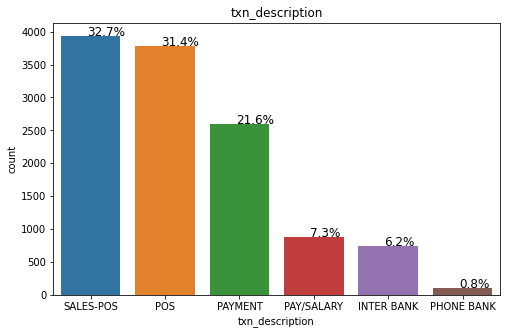

In [24]:
plt.figure(figsize=(8,5))
plt.title("txn_description")
ax = sns.countplot(df['txn_description'], data=df, order = df['txn_description'].value_counts().index)
without_hue(ax,df['txn_description'])

Text(0.5, 1.0, 'txn_description by Age')

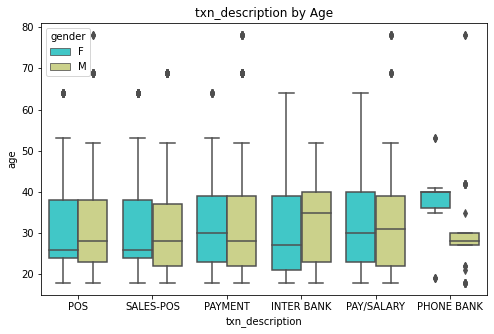

In [25]:
plt.figure(figsize=(8,5))
sns.boxplot(x='txn_description',y='age',data=df, palette='rainbow',hue='gender')
plt.title("txn_description by Age")

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


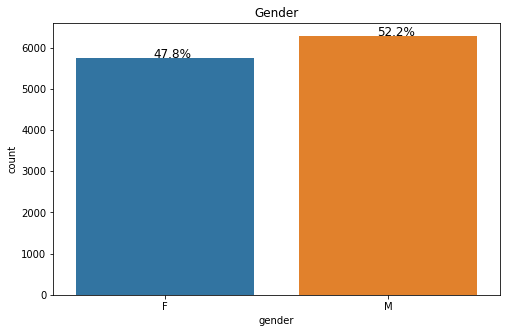

In [26]:
plt.figure(figsize=(8,5))
plt.title("Gender")
ax = sns.countplot(df['gender'], data=df)
without_hue(ax,df['gender'])

## Observation
- Status: Authorized is 64.1% and posted is 35.9%
- Card_present_flag: 51.4% is 1 and 12.6% is 0. Flag 1 has higher average amount
- Movement: Debit transaction is dominant with 92.7% compared to 7.3% of credit transaction
- Txn_description: Sales POS and POS are the most common transaction type(64%) while phone banking is the least(1%). Majority customers are between the age of 20 to 40
- Gender: Male has slightly more transactions than female with 4% higher
- Merchant_state: NSW has the most merchants followed by VIC

## Purchase Pattern Analysis

- Transaction has 2 types in terms of movement: credit and debit.
- We can see all the credit is for incoming salary. We assume all the outgoing(debit) is for the purchase transaction
- We are interested in purchase transaction to analyzing spending or purchase pattern 

In [27]:
df_credit=df[df['movement']=='credit']

In [28]:
df_credit['txn_description'].value_counts()

PAY/SALARY    883
Name: txn_description, dtype: int64

In [29]:
df_debit=df[df['movement']=='debit']

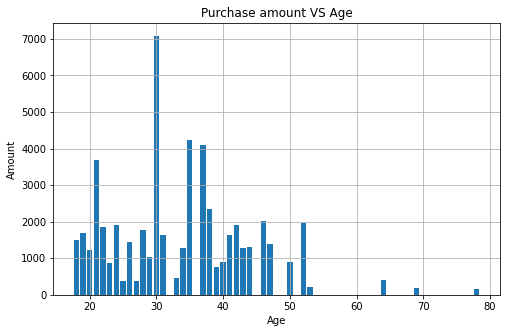

In [30]:
plt.figure(figsize=(8,5))
plt.bar(df_debit['age'], df_debit['amount'])
plt.title('Purchase amount VS Age')
plt.xlabel('Age')
plt.ylabel('Amount')
plt.grid(True)
plt.show()

## Transaction Pattern Analysis

Text(0.5, 1.0, 'Transcation Frequency VS Amount')

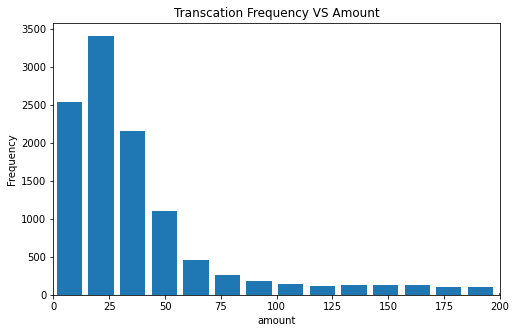

In [31]:
plt.figure(figsize=(8,5))
plt.hist(df_debit['amount'], bins = 500,rwidth=0.8)
plt.xlim(0,200)
plt.xlabel("amount")                         
plt.ylabel("Frequency")
plt.title("Transcation Frequency VS Amount")

Text(0.5, 1.0, 'Number of Transcations VS. Date of Month')

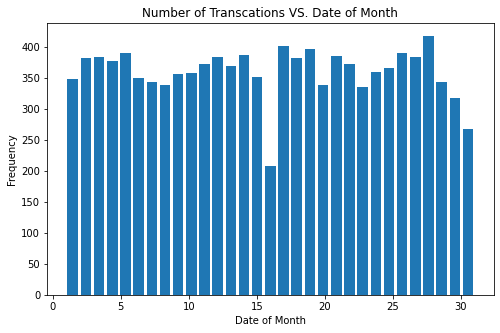

In [32]:
plt.figure(figsize=(8,5))
plt.hist(df_debit.dom, bins = 31,rwidth=0.8)
plt.xlabel("Date of Month")                         # Less number of transaction during month's end
plt.ylabel("Frequency")
plt.title("Number of Transcations VS. Date of Month")

Text(0.5, 1.0, 'Number of Transcations VS. Day of the Week')

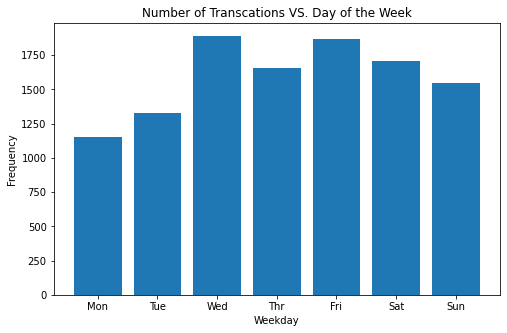

In [33]:
plt.figure(figsize=(8,5))
plt.hist(df_debit.weekday, bins=7, range=(-0.5,6.5), rwidth=0.8)
plt.xticks(range(7), 'Mon Tue Wed Thr Fri Sat Sun'.split())
plt.xlabel('Weekday')
plt.ylabel('Frequency')                                   
plt.title('Number of Transcations VS. Day of the Week')

Text(0.5, 1.0, 'Transaction Volume VS. Day of the Week')

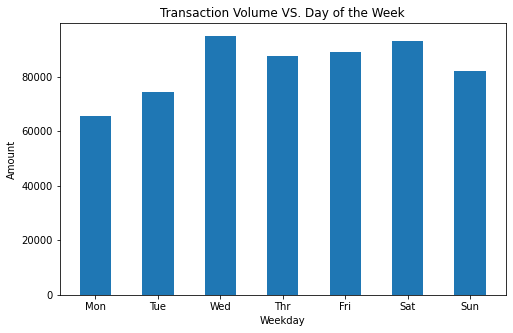

In [34]:
x=['Mon','Tue', 'Wed', 'Thr', 'Fri', 'Sat', 'Sun']
df1=df_debit.groupby('weekday')['amount'].sum()
plt.figure(figsize=(8,5))
plt.bar(x,df1,width=0.5)
plt.xticks(range(7), 'Mon Tue Wed Thr Fri Sat Sun'.split())
plt.xlabel('Weekday')
plt.ylabel('Amount')                                                   
plt.title('Transaction Volume VS. Day of the Week')

## Transaction Pattern Analysis

Text(0.5, 1.0, 'Average Transaction Amount VS. Day of the Week')

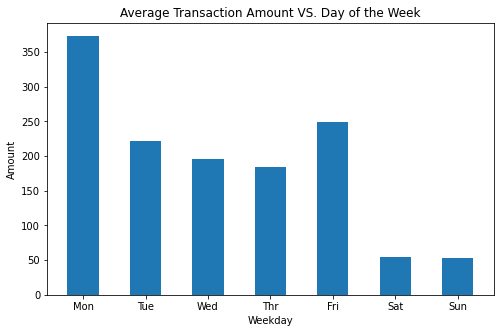

In [35]:
x=['Mon','Tue', 'Wed', 'Thr', 'Fri', 'Sat', 'Sun']
df_mean=df.groupby('weekday')['amount'].mean()
plt.figure(figsize=(8,5))
plt.bar(x,df_mean,width=0.5)
plt.xticks(range(7), 'Mon Tue Wed Thr Fri Sat Sun'.split())
plt.xlabel('Weekday')
plt.ylabel('Amount')                                                   
plt.title('Average Transaction Amount VS. Day of the Week')

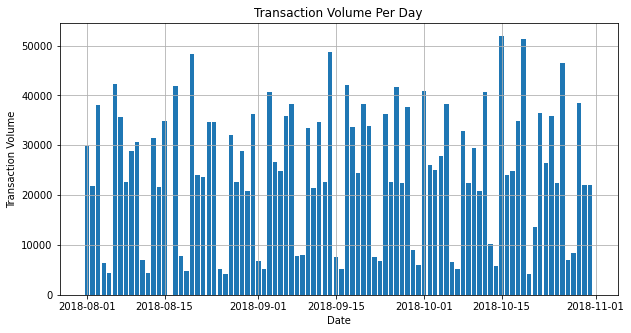

In [36]:
plt.figure(figsize=(10,5))
volume_by_day = df.groupby('date').sum()
plt.bar(volume_by_day.index, volume_by_day['amount'])
plt.title('Transaction Volume Per Day')
plt.xlabel('Date')
plt.ylabel('Transaction Volume')
plt.grid(True)
plt.show()

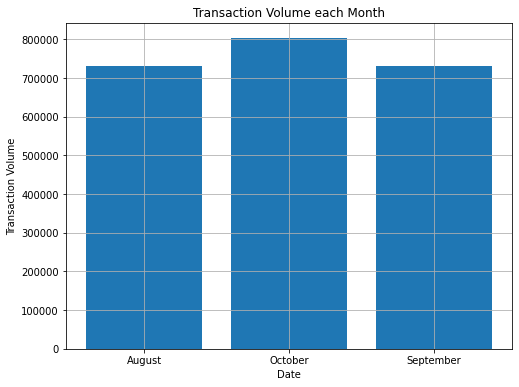

In [37]:
plt.figure(figsize=(8,6))
volume_by_day = df.groupby('month').sum()
plt.bar(volume_by_day.index, volume_by_day['amount'])
plt.title('Transaction Volume each Month')
plt.xlabel('Date')
plt.ylabel('Transaction Volume')
plt.grid(True)
plt.show()

In [38]:
df_cus_aug = df[df['month'] == "August"].groupby("customer_id").mean()
df_gen_aug = df[df['month'] == "August"].groupby("gender").mean()

mean_f_bal_aug = df_gen_aug["balance"].iloc[0]
mean_m_bal_aug = df_gen_aug["balance"].iloc[1]
n_points = len(df_cus_aug["age"])

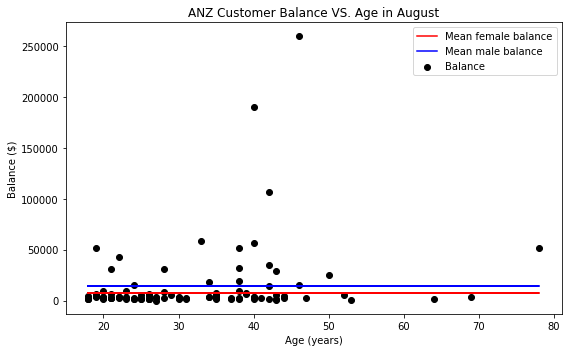

In [39]:
plt.figure(figsize=(8,5))
plt.scatter(df_cus_aug["age"], df_cus_aug["balance"], c="black", label="Balance")
plt.plot(df_cus_aug["age"], np.linspace(mean_f_bal_aug,mean_f_bal_aug,n_points), c="r", label = "Mean female balance")
plt.plot(df_cus_aug["age"], np.linspace(mean_m_bal_aug,mean_m_bal_aug,n_points), c="b", label = "Mean male balance")
plt.title("ANZ Customer Balance VS. Age in August")
plt.xlabel("Age (years)")
plt.ylabel("Balance ($)")
plt.legend()
plt.tight_layout()

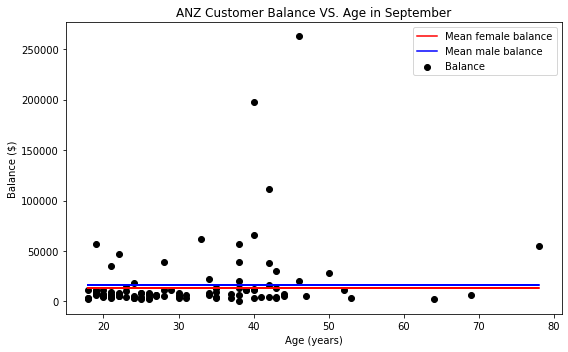

In [40]:
df_cus_sep = df[df['month'] == "September"].groupby("customer_id").mean()
df_gen_sep = df[df['month'] == "September"].groupby("gender").mean()

mean_f_bal_sep = df_gen_sep["balance"].iloc[0]
mean_m_bal_sep = df_gen_sep["balance"].iloc[1]
n_points = len(df_cus_sep["age"])

plt.figure(figsize=(8,5))
plt.scatter(df_cus_sep["age"], df_cus_sep["balance"], c="black", label="Balance")
plt.plot(df_cus_sep["age"], np.linspace(mean_f_bal_sep,mean_f_bal_sep,n_points), c="r", label = "Mean female balance")
plt.plot(df_cus_sep["age"], np.linspace(mean_m_bal_sep,mean_m_bal_sep,n_points), c="b", label = "Mean male balance")
plt.title("ANZ Customer Balance VS. Age in September")
plt.xlabel("Age (years)")
plt.ylabel("Balance ($)")
plt.legend()
plt.tight_layout()

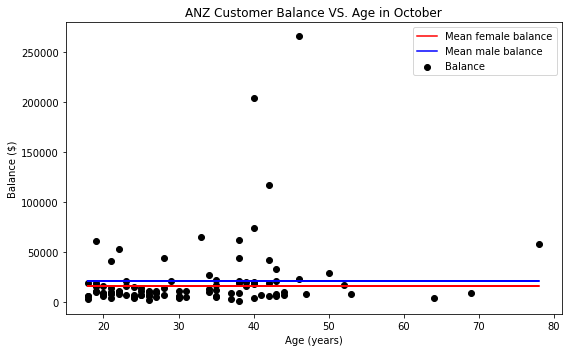

In [41]:
df_cus_oct = df[df['month'] == "October"].groupby("customer_id").mean()
df_gen_oct = df[df['month'] == "October"].groupby("gender").mean()

mean_f_bal_oct = df_gen_oct["balance"].iloc[0]
mean_m_bal_oct = df_gen_oct["balance"].iloc[1]
n_points = len(df_cus_oct["age"])

plt.figure(figsize=(8,5))
plt.scatter(df_cus_oct["age"], df_cus_oct["balance"], c="black", label="Balance")
plt.plot(df_cus_oct["age"], np.linspace(mean_f_bal_oct,mean_f_bal_oct,n_points), c="r", label = "Mean female balance")
plt.plot(df_cus_oct["age"], np.linspace(mean_m_bal_oct,mean_m_bal_oct,n_points), c="b", label = "Mean male balance")
plt.title("ANZ Customer Balance VS. Age in October")
plt.xlabel("Age (years)")
plt.ylabel("Balance ($)")
plt.legend()
plt.tight_layout()

## Salary Analysis

In [42]:
# Calculate customer salary payment per month
df_salary = df_credit.groupby(by=['customer_id', 'month'], as_index = False).sum()
df_salary.rename(columns={'amount': 'monthly_salary'}, inplace=True)
df_salary.drop(['age','dom'], axis=1,inplace=True)
df_salary.head(6)

,customer_id,month,card_present_flag,balance,monthly_salary,weekday
0,CUS-1005756958,August,0.0,6363.18,3881.88,4
1,CUS-1005756958,October,0.0,38701.45,4852.35,5
2,CUS-1005756958,September,0.0,16278.02,3881.88,4
3,CUS-1117979751,August,0.0,14693.52,7157.30,0
4,CUS-1117979751,October,0.0,46695.90,10735.95,0
5,CUS-1117979751,September,0.0,22311.00,7157.30,0


In [43]:
df_annual_salary = df_credit.groupby(by=['customer_id'], as_index = False).sum()
df_annual_salary.drop(['age','dom','balance','weekday'], axis=1,inplace=True)
df_annual_salary['annual_salary']=df_annual_salary['amount']*4
df_annual_salary.rename(columns={'amount': 'three_month_salary'}, inplace=True)
df_annual_salary.head(6)

,customer_id,card_present_flag,three_month_salary,annual_salary
0,CUS-1005756958,0.0,12616.11,50464.44
1,CUS-1117979751,0.0,25050.55,100202.20
2,CUS-1140341822,0.0,11499.06,45996.24
3,CUS-1147642491,0.0,22248.07,88992.28
4,CUS-1196156254,0.0,27326.11,109304.44
5,CUS-1220154422,0.0,15976.52,63906.08


## Predict annual salary for each customer

In [44]:
#relevant feature selection from consumption dataframe
data_feature= df_debit[['customer_id', 'age','balance','gender','amount']]

# one hot encoding for gender( 1= male, 0= female)
customer_data = pd.get_dummies(data_feature, columns = ['gender'], drop_first = True)

df_final_temp=pd.merge(df_annual_salary,customer_data,on='customer_id')
df_final=df_final_temp.groupby(['customer_id']).mean().reset_index()

In [45]:
df_final.to_csv('./ANZ_pred.csv')

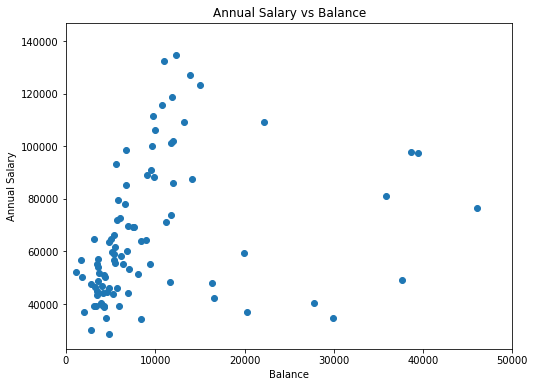

In [46]:
plt.figure(figsize=(8,6))
plt.scatter(df_final['balance'], df_final['annual_salary'])
plt.xlim(0,50000)
plt.title('Annual Salary vs Balance')
plt.xlabel('Balance')
plt.ylabel('Annual Salary')
plt.show()

- For balance over 20,000, there is no obvious correlation to the annual salary.
- We can focus on the balance below 16,000
- There is positive correlation between balance and annual salary for the balance below 16,000
- Therefore if the outliers are exluded, the balance is a good indicator of the annual salary

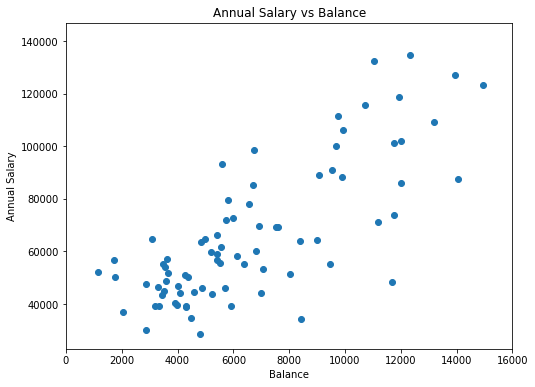

In [47]:
plt.figure(figsize=(8,6))
plt.scatter(df_final['balance'], df_final['annual_salary'])
plt.xlim(0,16000)
plt.title('Annual Salary vs Balance')
plt.xlabel('Balance')
plt.ylabel('Annual Salary')
plt.show()

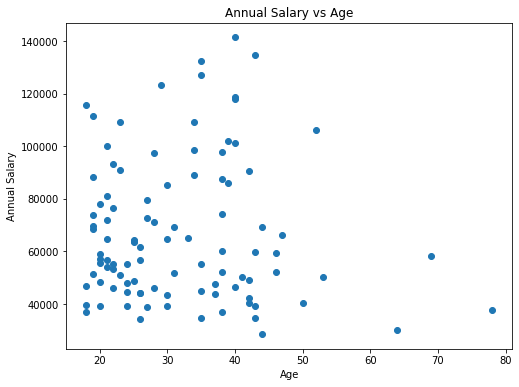

In [48]:
plt.figure(figsize=(8,6))
plt.scatter(df_final['age'], df_final['annual_salary'])
plt.title('Annual Salary vs Age')
plt.xlabel('Age')
plt.ylabel('Annual Salary')
plt.show()

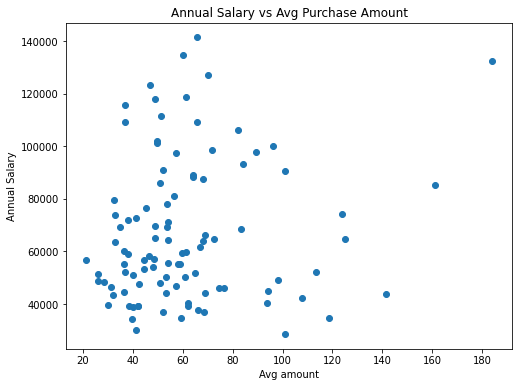

In [49]:
plt.figure(figsize=(8,6))
plt.scatter(df_final['amount'], df_final['annual_salary'])
plt.title('Annual Salary vs Avg Purchase Amount')
plt.xlabel('Avg amount')
plt.ylabel('Annual Salary')
plt.show()

# Conclusions and Recommendations

- Purchase amount distribution shows that customers aged 30 to 40 have the most spending power. They are the target customers for financial products like credit cards and debit cards.
- Some customers with lower salary still have large amount of balance. Their salary is not the main income source. They are not the target for loan products but it is good to introduce investing products like ANZ Share Investing or Superannuation.
- The customers with annual salary over AUD100,000 usually have balance over AUD10,000. They are the target customers for personal loans and home loans.
- The largest number of purchases, the largest amount of purchases and the largest average amount per transaction are all happened on Wednesday and afterwards. Less purchase activities happened on Monday and Tuesday. The promotions could be arranged from Wednesday to Sunday to encourage customers use credit or debit cards. The stimulation plan include triple-points, cash back or discount. 